<a href="https://colab.research.google.com/github/trejkev/natural_language_processing_course/blob/main/Natural_Language_Processing_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tokenization**
---

This notebook is focused on tokenizing large texts to exemplify how this initial stage of NLP is performed.

The whole exercise is based in the following web page: https://www.crhoy.com/tecnologia/reglamento-de-ciberseguridad-para-5g-no-se-sometio-a-consulta-publica/

**Summary of the Procedure**

For this exercise, tokenization will be done by pharagraphs at first, then, tokenization by sentences will be done.

1. **Tokenization by Pharagraph**: At first, detection of the body of the file will be performed, then, the detection of the pharagraphs will be performed, and finally, a clean up of any other chain or irregular/senseless "word" will be performed to end-up only with the document portions valuable, with an extra feature that detects if the "pharagraph" after the cleanup is zero length, it automatically removes it.

2. **Tokenization by sentences**: A regular expression to detect any character up to an end-of-line character was used, so that we can split every pharagraph into the different sentences that compose them.

3. **Tokenization by word**: Once tokenization by sentences is performed, splitting the sentences by white spaces will be performed, obtaining the final tokens from the new under revision.

-- **Notes**

1. All the regular expressions used are not taking care of special characters as is, since they were constructed to finde everything up to the next end of token tag or symbol.

---


Input document Processing
--

To perform the tokenization, re library was used. There was an auxiliary method created, named joint_matches, which simply takes a list of strings, and creates a concatenation of those strings in a resulting string.

In [ ]:
import re # library used to deal with regular expressions

def joint_matches(lMatches):
  sMatches = ""
  for matching in lMatches:
    sMatches += f"{matching}\n"
  return sMatches

with open('/content/Text_to_Analyze.html', 'r') as f:
  sOriginalText = f.read()

Tokenization by Pharagraph
--

Afterwards, to perform the tokenization by pharagraph, a regular expression to detect everything between pharagraph tags was created, so that it will match any character between these tags.

With the regular expression used, I was capable of detecting all the sections desired, therefore, no extra efforts to detect special characters was needed. However, if you take a look at the results, the output is quite dirty, since it includes extra information not required for this processing, like HTML tags and special variables, something required to correct before telling that this is the final result.

In [ ]:
pharagraphsRegEx = r"<p>(.*?)</p>"                        # RegEx for all pharagraphs
bodyRegEx        = r"<body[^>]*>(.*)((\s)+(.+))+</body>"  # RegEx to detect the body of the HTML

# -- Select only the body of the html -- #
matches = re.finditer(bodyRegEx, sOriginalText, re.MULTILINE)
sOriginalText = [i.group(0) for i in matches][0]

# -- Tokenization by pharagraph -- #
lDirtyPharagraphs = re.findall(pharagraphsRegEx, sOriginalText)

# Print the tokenization results
print("Tokenization by pharagraph (dirty) results [pharagraph # - pharagraph]:")
iCounter = 1;
for sPharagraph in lDirtyPharagraphs:
  print(f"[{iCounter} - {sPharagraph}]")
  iCounter += 1

Tokenization by pharagraph (dirty) results [pharagraph # - pharagraph]:
[1 - ]
[2 - (CRHoy.com).-El<strong> reglamento de ciberseguridad para la red 5G</strong> no se socializó y <strong>en ningún momento se sometió a consulta pública.</strong>]
[3 - Esto a pesar de que <strong>la legislación</strong> costarricense determina&nbsp;<strong>que previo a su aprobación, debe consultarse públicamente la reglamentación.</strong>]
[4 - ]
[5 - Así <a href="http://www.pgrweb.go.cr/scij/Busqueda/Normativa/Normas/nrm_texto_completo.aspx?param1=NRTC&amp;nValor1=1&amp;nValor2=13231&amp;nValor3=90116" target="_blank" rel="noopener noreferrer">lo establece la Ley General de la Administración Pública</a> en el Título Noveno de los Procedimientos Especiales en el Capítulo Único de la Elaboración de Disposiciones de Carácter General.]
[6 - <em>Artículo 361:</em>]
[7 - <em>1. Se concederá audiencia a las entidades descentralizadas sobre los proyectos de disposiciones generales que puedan afectarlas.</em>]

After obtaining the pharagraphs on their dirty form, the next step is to clean them up to look as clear as possible for human beings, this includes HTML tags removal, magazine name detection, and special variables removal.

In [ ]:
otherTagsRegEx   = r"<[^>]*>|{[^}]*}|{|}|[0-9]+. |\&\w+;|-" # RegEx for other tags or trash into the pharagraphs

# Clean-up the pharagraph unnecessary tags
lCleanPharagraphs = []
for sPharagraph in lDirtyPharagraphs:
  lExtraTags = re.findall(otherTagsRegEx, sPharagraph)
  for tag in lExtraTags:
    sPharagraph = sPharagraph.replace(tag, "")
  if len(sPharagraph.strip()) > 0:
    lCleanPharagraphs.append(sPharagraph.replace("CRHoy.com", "CRHoy")) # Standardize magazine's name

# Print the tokenization results
print("Tokenization by pharagraph (clean) results [pharagraph # - pharagraph]:")
iCounter = 1;
for sPharagraph in lCleanPharagraphs:
  print(f"[{iCounter} - {sPharagraph}]")
  iCounter += 1
sCleanPharagraphs = joint_matches(lCleanPharagraphs)

Tokenization by pharagraph (clean) results [pharagraph # - pharagraph]:
[1 - (CRHoy).El reglamento de ciberseguridad para la red 5G no se socializó y en ningún momento se sometió a consulta pública.]
[2 - Esto a pesar de que la legislación costarricense determinaque previo a su aprobación, debe consultarse públicamente la reglamentación.]
[3 - Así lo establece la Ley General de la Administración Pública en el Título Noveno de los Procedimientos Especiales en el Capítulo Único de la Elaboración de Disposiciones de Carácter General.]
[4 - Artículo 361:]
[5 - Se concederá audiencia a las entidades descentralizadas sobre los proyectos de disposiciones generales que puedan afectarlas.]
[6 - Se concederá a las entidades representativas de intereses de carácter general o corporativo afectados por la disposición la oportunidad de exponer su parecer, dentro del plazo de diez días, salvo cuando se opongan a ello razones de interés público o de urgencia debidamente consignadas en el anteproyecto.

Tokenization by sentences
--

To perform the tokenization by sentences, there was a need to detect any character (non-greedy) with stop signal being any of the sentences stop characters, see sentencesRegEx variable, which was fully achieved with the code below.

In [ ]:
sentencesRegEx   = r".+?[;,.!?:]"  # RegEx for sentences

# -- Tokenization by sentences -- #
lSentences = re.findall(sentencesRegEx, sCleanPharagraphs)
iCounter = 0
print("Tokenization by sentences results [sentence # - sentence]]:")
for sentence in lSentences:
  # Remove end-of-sentences characters
  sentence = sentence.replace(";","")
  sentence = sentence.replace(",","")
  sentence = sentence.replace(".","")
  sentence = sentence.replace("!","")
  sentence = sentence.replace("?","")
  sentence = sentence.replace(":","")
  if sentence[0] == " ":
    sentence = sentence[1:]
  print(f"[{iCounter} - {sentence}]")
  lSentences[iCounter] = sentence
  iCounter += 1

Tokenization by sentences results [sentence # - sentence]]:
[0 - (CRHoy)]
[1 - El reglamento de ciberseguridad para la red 5G no se socializó y en ningún momento se sometió a consulta pública]
[2 - Esto a pesar de que la legislación costarricense determinaque previo a su aprobación]
[3 - debe consultarse públicamente la reglamentación]
[4 - Así lo establece la Ley General de la Administración Pública en el Título Noveno de los Procedimientos Especiales en el Capítulo Único de la Elaboración de Disposiciones de Carácter General]
[5 - Artículo 361]
[6 - Se concederá audiencia a las entidades descentralizadas sobre los proyectos de disposiciones generales que puedan afectarlas]
[7 - Se concederá a las entidades representativas de intereses de carácter general o corporativo afectados por la disposición la oportunidad de exponer su parecer]
[8 - dentro del plazo de diez días]
[9 - salvo cuando se opongan a ello razones de interés público o de urgencia debidamente consignadas en el anteproye

Tokenization by words
--

To perform this tokenization, the code is quite simple, we already have a list with all the sentences, therefore, we just have to take every sentence and split it by spaces, for this intent we don't need a regular expression, since sentences can already be splitted by a token using the split method, which, in this case, can be the white space.

In [ ]:
lWords = []
iCounter = 1
print("Tokens with duplicates (aka text size) [token # - token]:")
for sentence in lSentences:
  lTokens = sentence.split(" ")
  for token in lTokens:
    # Remove parentheses and quotation marks
    token = token.replace("(","")
    token = token.replace(")","")
    token = token.replace('“',"")
    token = token.replace('”',"")
    token = token.replace('"',"")
    token = token.replace("'","")
    token = token.lower() # Standardize to lowercase
    # Does not consider tokens with digits
    if any(char.isdigit() for char in token) == False:
      lWords.append(token)
      print(f"[{iCounter} - {token}]")
      iCounter += 1

Tokens with duplicates (aka text size) [token # - token]:
[1 - crhoy]
[2 - el]
[3 - reglamento]
[4 - de]
[5 - ciberseguridad]
[6 - para]
[7 - la]
[8 - red]
[9 - no]
[10 - se]
[11 - socializó]
[12 - y]
[13 - en]
[14 - ningún]
[15 - momento]
[16 - se]
[17 - sometió]
[18 - a]
[19 - consulta]
[20 - pública]
[21 - esto]
[22 - a]
[23 - pesar]
[24 - de]
[25 - que]
[26 - la]
[27 - legislación]
[28 - costarricense]
[29 - determinaque]
[30 - previo]
[31 - a]
[32 - su]
[33 - aprobación]
[34 - debe]
[35 - consultarse]
[36 - públicamente]
[37 - la]
[38 - reglamentación]
[39 - así]
[40 - lo]
[41 - establece]
[42 - la]
[43 - ley]
[44 - general]
[45 - de]
[46 - la]
[47 - administración]
[48 - pública]
[49 - en]
[50 - el]
[51 - título]
[52 - noveno]
[53 - de]
[54 - los]
[55 - procedimientos]
[56 - especiales]
[57 - en]
[58 - el]
[59 - capítulo]
[60 - único]
[61 - de]
[62 - la]
[63 - elaboración]
[64 - de]
[65 - disposiciones]
[66 - de]
[67 - carácter]
[68 - general]
[69 - artículo]
[70 - se]
[71 - conc

At this point, it is necessary to detect if the tokens are repeated or not, to do this, an iterative approach will be done, and also a standardization of the tokens to be lowercase will be used.

In [ ]:
lTokensDuplicateFree = list(set(lWords)) # Removes duplicates
lTokensDuplicateFree.sort() # Sorts the tokens
iCounter = 1
print("Tokens without duplicates [token # - token]:")
for token in lTokensDuplicateFree:
  print(f"[{iCounter} - {token}]")
  iCounter += 1
print(f"There is a total of {iCounter} words/tokens")

Tokens without duplicates [token # - token]:
[1 - a]
[2 - aconseje]
[3 - administración]
[4 - afectados]
[5 - afectarlas]
[6 - agosto]
[7 - ahora]
[8 - al]
[9 - alcance]
[10 - anteproyecto]
[11 - aplicables]
[12 - aprobación]
[13 - artículo]
[14 - así]
[15 - audiencia]
[16 - autoridades]
[17 - basados]
[18 - cada]
[19 - camtic]
[20 - capítulo]
[21 - carácter]
[22 - caso]
[23 - ciberseguridad]
[24 - ciencia]
[25 - competencias]
[26 - comunicación]
[27 - con]
[28 - concederá]
[29 - confirmaron]
[30 - conformidad]
[31 - conocen]
[32 - consignadas]
[33 - consulta]
[34 - consultarse]
[35 - consultó]
[36 - corporativo]
[37 - costarricense]
[38 - crhoy]
[39 - cuando]
[40 - cámara]
[41 - de]
[42 - debe]
[43 - debidamente]
[44 - del]
[45 - dentro]
[46 - descentralizadas]
[47 - determinaque]
[48 - diario]
[49 - diez]
[50 - disposiciones]
[51 - disposición]
[52 - dispuestas]
[53 - dispuesto]
[54 - documento]
[55 - durante]
[56 - días]
[57 - ejecutivo]
[58 - el]
[59 - elaboración]
[60 - ello]
[61 

Since we have a total of 161 tokens, our vocabulary would be, at least, O(N^(1/2)), which in this case, since N is 161, my vocabulary would be about 13 set of types total.

Tokens frequency computation
--

To detect the frequency of each token in the text, the following code will be used.

In [ ]:
lTokensWithFrequency = []
lFrequencies = []
# Detect the times a token is equal to the full list of words into the text
for token in lTokensDuplicateFree:
  iFrequency = 0
  for word in lWords:
    if token == word:
      iFrequency += 1
  lTokensWithFrequency.append([iFrequency, token])
  if iFrequency not in lFrequencies:
    lFrequencies.append(iFrequency)

# Sort the frequency-token list in reverse order
lTokensWithFrequency.sort(key = lambda x: x[0], reverse = True)

# Count the tokens with equivalent frequency
frequencyWithAppearance = []
print("Tokens with equivalent frequency [frequency, # of elements]:")
for frequency in lFrequencies:
  iCounter = 0
  for tokenWithFrequency in lTokensWithFrequency:
    if tokenWithFrequency[0] == frequency:
      iCounter += 1
  frequencyWithAppearance.append([frequency, iCounter])
frequencyWithAppearance.sort(key = lambda x: x[0], reverse = True)
for element in frequencyWithAppearance:
  print(element)

Tokens with equivalent frequency [frequency, # of elements]:
[30, 1]
[21, 1]
[15, 1]
[11, 1]
[10, 2]
[9, 1]
[5, 1]
[4, 5]
[3, 8]
[2, 23]
[1, 118]


Frequency Plot
--

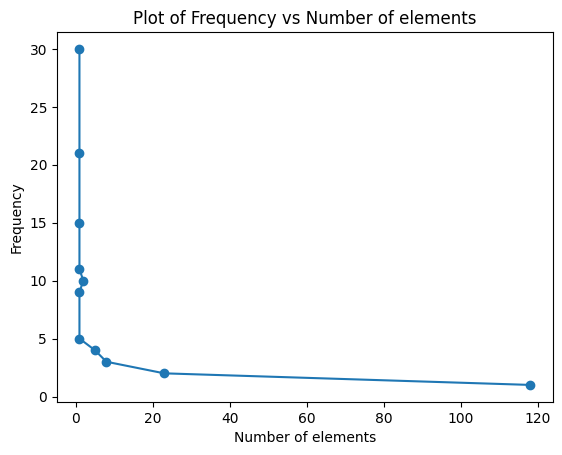

In [ ]:
import matplotlib.pyplot as plt

y_data = [item[0] for item in frequencyWithAppearance]
x_data = [item[1] for item in frequencyWithAppearance]

plt.plot(x_data, y_data, marker='o', linestyle='-')
plt.xlabel('Number of elements')
plt.ylabel('Frequency')
plt.title('Plot of Frequency vs Number of elements')
plt.show()

Relation with Zipf distribution
--

Looking at these results, the data obtained can be easily translated to Zipf distribution main call, which is, in easy words, that in a language, only a very short number of words are highly frequent, while most of the words are rare. As you can tell in the plot above, there are only a short number of elements (words) that have a high frequency, but the majority fall to be rare (only one or two appearances). See the following image taken from _N. Unnikrishnan, and N. Balakrishnan, in Reliability Modelling and Analysis in Discrete Time, 2018_, where they show the common behavior of a Zipf distribution (quite similar to what we obtained).

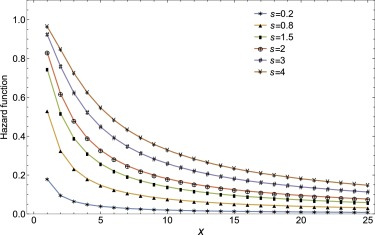